# Convoluzione 

Spesso le distribuzioni sperimentali mostrano la combinazione di più effetti. 


Nel caso discreto, se la variabile $y$ è data dalla somma di due variabili indipendenti $x$ e $z$ di conosciamo le distribuzioni di probabilità $P_x(x)$ e $P_z(z)$, possiamo scrivere:

$\displaystyle P_y(y) = \sum_{x, y:y=x+z}\!\! P(x, z) 
= \sum_{x}P_x(x) P_z(y-x)$

Questo modo di combinare due PDF viene detto **convoluzione**.

Abbiamo già discusso che la somma di due bionomiali è ancora una binomiale, ossia la *convoluzione* di due binomiali è ancora binomiale.

Ancora, la convoluzione di due poissoniane è ancora una poissoniana.

## Caso contiuo

A due dimensioni, considerando $\varphi: (x,z)\in X\times Z \mapsto y=\varphi(x,z)\in Y$:

$\displaystyle f_y(y) = \frac{\mathrm{d}P(y)}{\mathrm{d}y} = \int\delta(y - \varphi(x,z))\,f_{xz}(x,z)\,\mathrm{d}x\mathrm{d}z$

Se $\varphi(x,z)=x+z$ e se le distribuzioni di $x$ e $z$ sono indipendenti, ossia: 

$f_{xz}(x,z) = f_x(x) f_z(z)$


abbiamo:

$\displaystyle f_y(y) =\int\delta(y - x-z)\,f_{x}(x)f_z(z)\,\mathrm{d}x\mathrm{d}z
= \int\,f_{x}(x)f_z(y-x)\,\mathrm{d}x
$

Il limite continuo è del tutto simile all'espressione ottenuta nel caso discreto:

$\displaystyle 
f_y(y) = \int_{-\infty}^{+\infty}\!\! f_x(x)\,f_z(y-x)\,\mathrm{d}x
$

Ad esempio, uno spettro che secondo una distrbuzione teorica segue la distribuzione $f(x)$ può essere misurato attraverso uno strumento o un rivelatore che, per ogni valore vero $x$ restituisce una risposta che segue la distribuzione $y$ che segune la distribuzione $g(y; x)$.

In diversi casi, la distribuzione di $y$ $g(y; x)$ dipende da $y$ secondo la differenza $y - x$: $g(y; x)=g(y - x)$. In questo caso, la PDF di $y$ si può scrivere nel modo seguente:

$\displaystyle f(x), g(y-x) \mapsto (f\circledast g)(y) = \int_{-\infty}^{+\infty}\!\! f(x)\, g(y - x)\,\mathrm{d}x$

Possiamo implementare l'integrazione come somma su un numero finito di passi con la funzione [```convolve```](https://numpy.org/doc/stable/reference/generated/numpy.convolve.html).

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
gamma = 2
x0 = 10
sigma = 0.8
def lorentz(x):
    return 1/math.pi * gamma/2 / ((x-x0)**2+(gamma/2)**2)
def uniform(x):
    return np.array([(1.0 if (5<xx and xx<15) else 0.0) for xx in x])
def gaussian(y):
    return 1/math.sqrt(2*math.pi)/sigma*np.exp(-y**2/2/sigma**2)
f=lorentz
#f = uniform
g = gaussian

Calcoliamo i valori della funzione $f$ per punti, e normalizziamo il contenuto.

Se usiamo una Lorenziana, bisogna fare attenzione perché non è integrabile in $]-\infty, +\infty[$, 
ma può essere normalizzata in un intervallo limitato $[a, b]$.

In [2]:
xs = np.linspace(0, 20, 201)
ys = f(xs)
ys/=ys.sum()

Bisogna fare attenzione che l'integrazione richiede la moltiplicazione per $\mathrm{d}x$, che va aggiunto "manualmente" nel codice.

In [3]:
zs = np.linspace(-4, 4, 81)
ycs = np.convolve(g(zs), ys, 'same')
ycs*=0.1

Verifichiamo la normalizzazione dei due casi per accertarci della consistenza del codice.

In [4]:
print("norm: {:.4f}, {:.4f}".format(ys.sum(), ycs.sum()))

norm: 1.0000, 0.9976


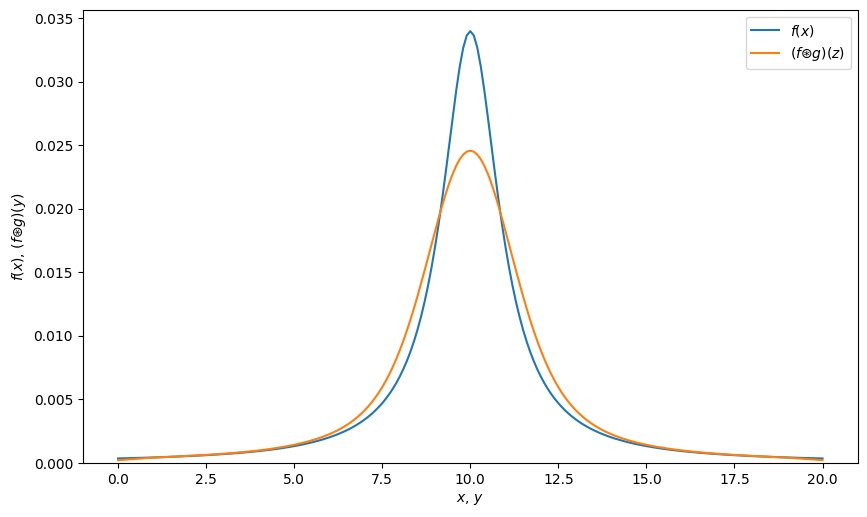

In [5]:
plt.figure(figsize=(10,6), dpi=100)
plt.plot(xs, ys, label='$f(x)$')
plt.plot(xs, ycs, label='$(f\circledast g)(z)$')
plt.xlabel('$x$, $y$')
plt.ylabel('$f(x)$, $(f\circledast g)(y)$')
plt.ylim(0)
plt.legend()
plt.show()

In molti casi, la risoluzione sperimentale si può modellizzare come una gaussiana, ossia:

$\displaystyle g(y-x) = \frac{1}{\sqrt{2\pi}\sigma}\exp\left[-\frac{(y-x)^2}{2\sigma^2}\right]$

Nel limite in cui $\sigma\rightarrow 0$, $g(y-x)$ tende alla Delta di Dirac $\delta(y-x)$. In quel caso:

$\displaystyle (f\circledast g)(y) = \int_{-\infty}^{+\infty}\!\! f(x)\, \delta(y - x)\,\mathrm{d}x = f(y)$

Come c'era da aspettarsi, una risoluzione ideale non distorce il segnale.

## Convoluzione e trasformata di Fourier

La trasformata di Fourier di una funzione è definita come:
    
$\displaystyle \hat{g}(k) = \int_{-\infty}^{+\infty}\!\!g(z)\,e^{-ikz}\,\mathrm{d}z$

La trasformata inversa è invece:

$\displaystyle {g}(z) = \frac{1}{2\pi}\int_{-\infty}^{+\infty}\!\!\hat{g}(k)\,e^{ikz}\,\mathrm{d}k$

Si può dimostrare che la trasformata della convoluzione di due PDF è data dal prodotto delle trasformate:

$\widehat{f\circledast g} = \hat{f}\cdot\hat{g}$

In particolare, la trasformata di Fourier di una gaussiana si può calcolare analiticamente. Se:

$\displaystyle g(z) = \frac{1}{\sqrt{2\pi}\sigma}\exp\left[-\frac{z^2}{2\sigma^2}\right]$

allora: 

$\displaystyle \hat{g}(k) = \exp\left({-k\mu - \sigma^2 k^2/2}\right)$

In questo caso, si può usare l'algoritmo [*Fast Fourier Transform*](https://docs.scipy.org/doc/scipy/reference/tutorial/fft.html) per implementare numericamente la convoluzione. 

L'implementazione in python è [```fftconvolve```](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.fftconvolve.html#scipy.signal.fftconvolve), ed è conveniente se la convoluzione coinvolgere un numero molto grande di termini, riducendo la complessità da ${\cal O}(N^2)$ a ${\cal O}(N)$.

## Convoluzione di due gaussiane

Visto il risultato precedente, ma anche attraverso l'integrazione diretta, si può dimostrare che la convoluzione di due gaussiane è ancora una gaussiana che ha come valor medio la somma dei due valori medi e come varianza la somma delle due varianza. 

Sse la seconda gaussiana rappresenta un effetto di risoluzione, il secondo valor medio è nullo, quindi il valor medio risultante è quello della prima gaussiana.

## Convoluzione e sfocatura

Nel trattamento delle immagini, la convoluzione in due dimensioni con un *kernel* gaussiano o di altro tipo corrisponde alla sfocatura dell'immagine.

# *Unfolding*

Dato uno spettro misurato, è possibile *correggere* l'effetto della convoluzione con una funzione nota. Questo problema prende il nome di *unfoldin* e ha aspetti computazionali non banali. 

Il trattamento esula dallo scopo di questo corso.